In [ ]:
import subprocess
import sys


# 需要的库
libraries = [
    "pandas", "numpy", "matplotlib", "torch", "scipy", "sklearn", "PIL",
    "scikit-image"
]

# 自动安装缺失的库
def install_if_missing(lib_name):
    try:
        __import__(lib_name)
    except ImportError:
        print(f"Installing {lib_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", lib_name])

# 遍历所有库，逐个检查并安装
for lib in libraries:
    install_if_missing(lib)

# 现在可以正常导入所有库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.signal import argrelmax
import os
import random
from PIL import Image
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import color

print("All libraries are installed and imported successfully!")


Installing scikit-image...
All libraries are installed and imported successfully!


In [4]:
# Load the data
data = pd.read_csv('./data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')
rows = [x for x in data.index if data.loc[x]['Open'] == 0]
data = data.drop(rows, axis=0)
data

,Date,Close,Open,High,Low,PE
0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.34
1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.34
2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.34
3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.34
4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.34
...,...,...,...,...,...,...
15350,2020-12-24,3703.060000,3694.030000,3703.820000,3689.320000,33.77
15351,2020-12-28,3735.360000,3723.030000,3740.510000,3723.030000,33.77
15352,2020-12-29,3727.040000,3750.010000,3756.120000,3723.310000,33.77
15353,2020-12-30,3732.040000,3736.190000,3744.630000,3730.210000,33.77


<module 'matplotlib.pyplot' from 'c:\\Users\\yehang\\anaconda3\\envs\\MyPython\\Lib\\site-packages\\matplotlib\\pyplot.py'>

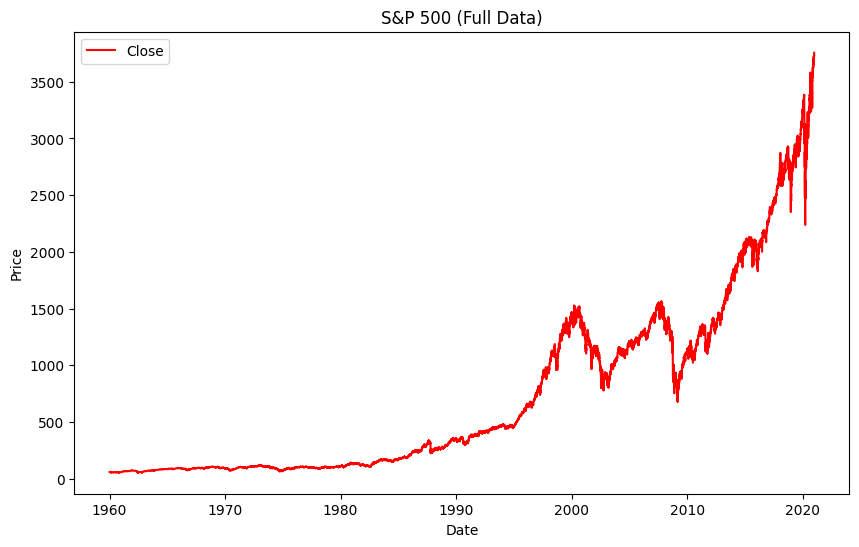

In [5]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values,'red', label = 'Close')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("S&P 500 (Full Data)")
plt

In [6]:
test_data = data.loc[ (data['Date']  >= '1980-01-01' )]
test_data.to_csv('test_data.csv')
test_data

,Date,Close,Open,High,Low,PE
5015,1980-01-02,105.760002,107.940002,108.430000,105.290001,8.85
5016,1980-01-03,105.220001,105.760002,106.080002,103.260002,8.85
5017,1980-01-04,106.519997,105.220001,107.080002,105.089996,8.85
5018,1980-01-07,106.809998,106.519997,107.800003,105.800003,8.85
5019,1980-01-08,108.949997,106.809998,109.290001,106.290001,8.85
...,...,...,...,...,...,...
15350,2020-12-24,3703.060000,3694.030000,3703.820000,3689.320000,33.77
15351,2020-12-28,3735.360000,3723.030000,3740.510000,3723.030000,33.77
15352,2020-12-29,3727.040000,3750.010000,3756.120000,3723.310000,33.77
15353,2020-12-30,3732.040000,3736.190000,3744.630000,3730.210000,33.77


In [7]:
data = data.loc[ (data['Date']  <= '2020-12-31' )]
data.to_csv('train_data.csv')
data

,Date,Close,Open,High,Low,PE
0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.34
1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.34
2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.34
3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.34
4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.34
...,...,...,...,...,...,...
15350,2020-12-24,3703.060000,3694.030000,3703.820000,3689.320000,33.77
15351,2020-12-28,3735.360000,3723.030000,3740.510000,3723.030000,33.77
15352,2020-12-29,3727.040000,3750.010000,3756.120000,3723.310000,33.77
15353,2020-12-30,3732.040000,3736.190000,3744.630000,3730.210000,33.77


<module 'matplotlib.pyplot' from 'c:\\Users\\yehang\\anaconda3\\envs\\MyPython\\Lib\\site-packages\\matplotlib\\pyplot.py'>

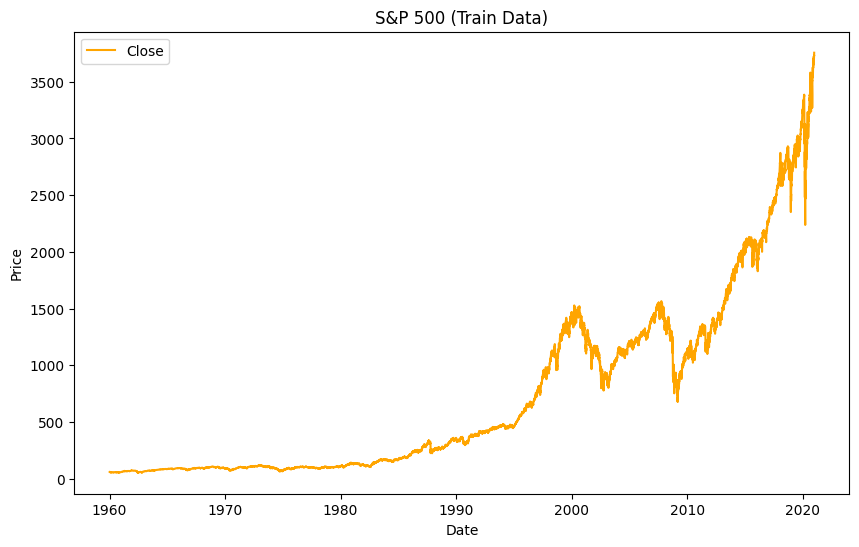

In [8]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values,'orange', label = 'Close')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("S&P 500 (Train Data)")
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\yehang\\anaconda3\\envs\\MyPython\\Lib\\site-packages\\matplotlib\\pyplot.py'>

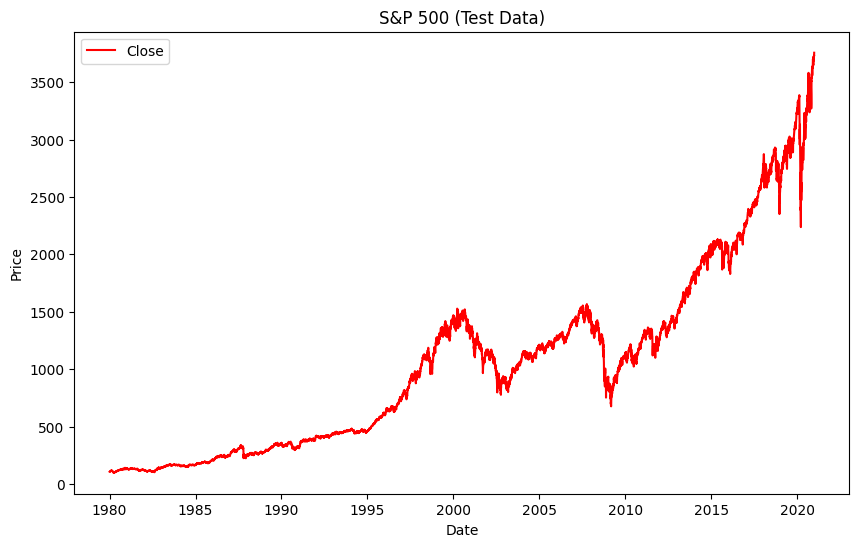

In [9]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(test_data.Date, test_data.Close.values,'red', label = 'Close')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("S&P 500 (Test Data)")
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\yehang\\anaconda3\\envs\\MyPython\\Lib\\site-packages\\matplotlib\\pyplot.py'>

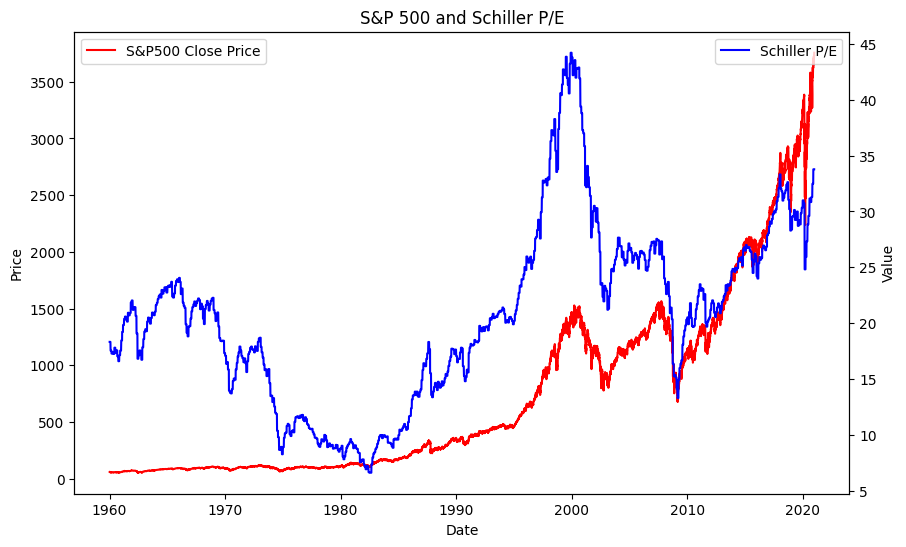

In [10]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values, 'red', label = 'S&P500 Close Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
ax2=plt.twinx()
ax2.plot(data.Date, data.PE.values, 'blue', label = 'Schiller P/E')
ax2.set_ylabel("Value")
plt.legend()

plt.title("S&P 500 and Schiller P/E")
plt

In [11]:
step2_data = data[['Close','PE']].values
step2_data

array([[  59.91    ,   18.34    ],
       [  60.389999,   18.34    ],
       [  60.130001,   18.34    ],
       ...,
       [3727.04    ,   33.77    ],
       [3732.04    ,   33.77    ],
       [3756.07    ,   33.77    ]])

In [15]:
step2_date_data = data['Date'].values
step2_date_data

array(['1960-01-04T00:00:00.000000000', '1960-01-05T00:00:00.000000000',
       '1960-01-06T00:00:00.000000000', ...,
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
step2_data_corr = np.append(step2_data, np.zeros([len(step2_data),1]),1)
step2_data_corr

array([[  59.91    ,   18.34    ,    0.      ],
       [  60.389999,   18.34    ,    0.      ],
       [  60.130001,   18.34    ,    0.      ],
       ...,
       [3727.04    ,   33.77    ,    0.      ],
       [3732.04    ,   33.77    ,    0.      ],
       [3756.07    ,   33.77    ,    0.      ]])

In [16]:
window_size = 28
corr_array = []
corr_date_array = []
for i in range(step2_data.shape[0]-window_size + 1):
    x = step2_data_corr[i:i+window_size, 0]
    y = step2_data_corr[i:i+window_size, 1]
    corr = np.corrcoef(x, y)
    corr_array.append(corr[1, 0])
    corr_date_array.append(step2_date_data[i+window_size - 1])
    step2_data_corr[i + window_size - 1][2] = corr[1, 0]
step2_data_corr

c:\Users\yehang\anaconda3\envs\MyPython\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\yehang\anaconda3\envs\MyPython\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[5.99100000e+01, 1.83400000e+01, 0.00000000e+00],
       [6.03899990e+01, 1.83400000e+01, 0.00000000e+00],
       [6.01300010e+01, 1.83400000e+01, 0.00000000e+00],
       ...,
       [3.72704000e+03, 3.37700000e+01, 8.45074514e-01],
       [3.73204000e+03, 3.37700000e+01, 8.23732279e-01],
       [3.75607000e+03, 3.37700000e+01, 7.82146873e-01]])

<module 'matplotlib.pyplot' from 'c:\\Users\\yehang\\anaconda3\\envs\\MyPython\\Lib\\site-packages\\matplotlib\\pyplot.py'>

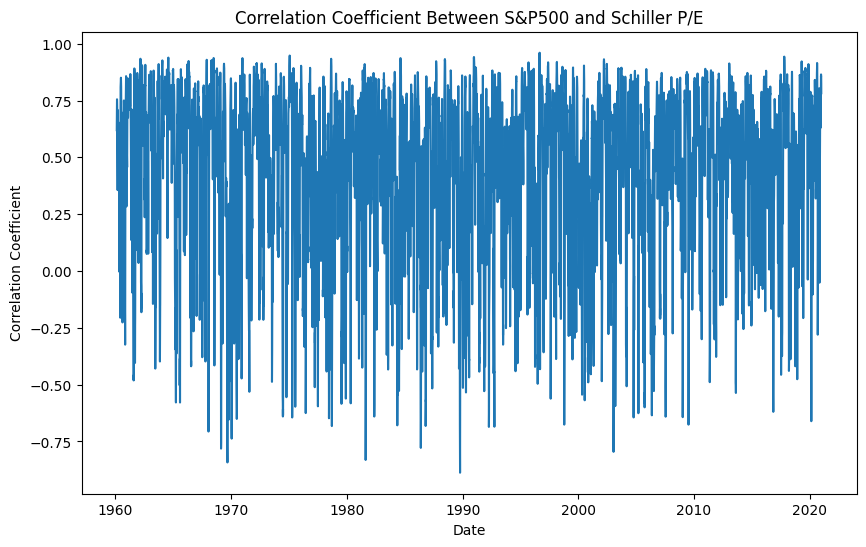

In [17]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(corr_date_array, corr_array, label = 'Corr')
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Coefficient Between S&P500 and Schiller P/E")
plt

In [18]:
curr_money = 1
money_arr = []
sell_date_arr = []
# if you haven't sell the stock, you cannot buy the new stock
sell_day = 0
for i in range(window_size-1, step2_data_corr.shape[0]):
    correlation = step2_data_corr[i,2]
    curr_price = step2_data_corr[(i-window_size+1):(i+1), 0]
    
    if correlation > 0.9 and (i-sell_day > window_size):
#     if correlation > 0.9:
        # sell at this point
        # buy at the local minia in this window interval (nsample interval)
        buy_price = min(curr_price)
        # in case of the overflow       
        sell_price = curr_price[len(curr_price)-1]
        curr_money = curr_money/buy_price*sell_price
        sell_day = i
        money_arr.append(curr_money)
        sell_date_arr.append(step2_date_data[sell_day])
curr_money

np.float64(6.761613881340019)

Text(0, 0.5, 'Money')

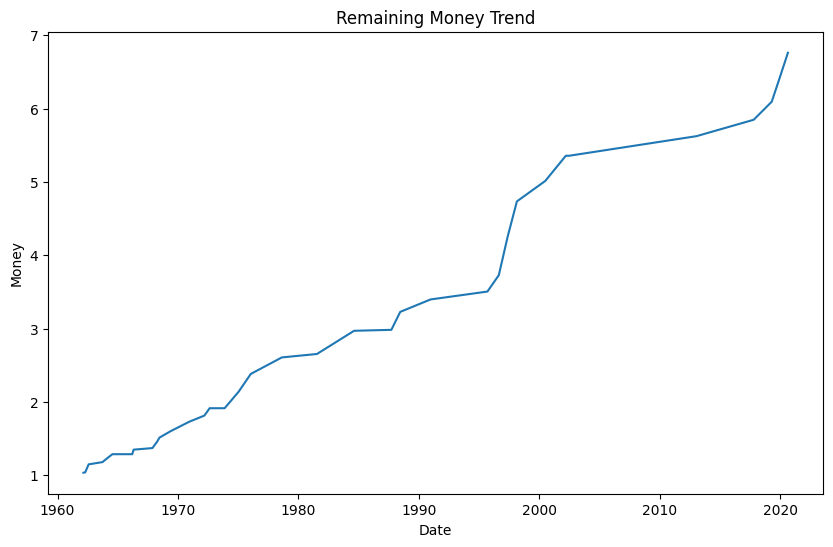

In [19]:
plt.figure(figsize=(10, 6));
plt.plot(sell_date_arr, money_arr, label='Close')
plt.title('Remaining Money Trend')
plt.xlabel('Date')
plt.ylabel('Money')

In [21]:
dataset = data[['Close']].values
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(15355, 1)

In [22]:
cnn_sell_point_arr = []
prev_sell_point = 0
for i in range(window_size-1, len(dataset)):
#     1. corr > 0.9
#     2. 卖出点必须和前一个卖出点间隔28天
#     3. 卖出点为当前28天的最大值
#     4. 卖出点的下一天（window以外的第一天）的价格必须下降
    if step2_data_corr[i][2] > 0.9 and i >= prev_sell_point + window_size and dataset[i][0] == max(dataset[(i-window_size+1):(i+1), 0]) and dataset[i][0] > dataset[i+1][0]:
        cnn_sell_point_arr.append(i)
        prev_sell_point = i
cnn_sell_point_arr

[648,
 938,
 1014,
 1586,
 2086,
 2729,
 3758,
 4668,
 6188,
 7152,
 7788,
 9220,
 9407,
 9598,
 10623,
 14550,
 14926]

In [23]:
# function to plot the sp500 price data and save the plot 
# 生成刚才求出的卖出点所在window的图像
def generate_image(dataset, day_num, directory, window_size):
    data = []
    xaxis = np.arange(0, window_size)
    for x in reversed(range(0, window_size)):
        data.append(dataset[day_num-x][0])        
    # plotting
    name = "day" + str(day_num)
    plt.axis('off')
    plt.plot(data, color ="black") 
    name = name + '.png'
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
    plt.savefig(directory + name, bbox_inches='tight', pad_inches=0, dpi = 100)
    plt.clf()    

In [167]:
import matplotlib.pyplot as plt

def generate_image_with_markers(dataset, i, save_directory, window_size):
    """
    Generate an image of the price window with buy/sell markers.
    """
    window_data = dataset[(i - window_size + 1):(i + 1), 0]  # Extract window data
    x_axis = range(len(window_data))  # X-axis is just index
    
    # Find buy/sell points
    buy_index = window_data.argmin()  # Local min (buy)
    sell_index = window_data.argmax()  # Local max (sell)
    
    buy_price = window_data[buy_index]
    sell_price = window_data[sell_index]
    
    # Plot the price curve
    plt.figure(figsize=(5, 5))  # Adjust figure size
    plt.plot(x_axis, window_data, color="black", linewidth=2)  # Price line
    
    # Highlight buy point (green circle)
    plt.scatter(buy_index, buy_price, color="green", marker='o', s=100, label="Buy Point")
    
    # Highlight sell point (red cross)
    plt.scatter(sell_index, sell_price, color="red", marker='x', s=100, label="Sell Point")
    
    plt.axis('off')  # Remove axes
    plt.legend()  # Add legend
    
    # Save the image
    save_path = f"{save_directory}/day{i}.png"
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Example usage:
# generate_image_with_markers(dataset, i, "train_sell_point_image", window_size)


In [25]:
#Create the CandaidateTrain folder manually, then run this to create all possible selling signals
train_sell_image_directory = 'train_sell_point_image/'
if not os.path.exists(train_sell_image_directory ):
    os.makedirs(train_sell_image_directory )

for i in cnn_sell_point_arr:
    #generate_image(dataset,i,train_sell_image_directory, window_size)
    generate_image(dataset,i,train_sell_image_directory, window_size)

<Figure size 800x800 with 0 Axes>

In [27]:
# not sell 
cnn_hold_point_arr = []
prev_hold_point = 0 # 上一个hold点的下标
for i in range(window_size-1,len(dataset)):
#     1. corr < -0.5
#     2. 当前hold点和前几个间隔28天
#     3. 当前hold点的价格不能是当前window的最高点
    if step2_data_corr[i][2] < -0.5  and i >= prev_hold_point + window_size and dataset[i][0] < max(dataset[(i-window_size+1):(i+1), 0]):
        cnn_hold_point_arr.append(i)
        prev_hold_point = i
#Now, we have a candidate not selling signal list
len(cnn_hold_point_arr)

51

In [ ]:
train_hold_image_directory = 'train_hold_point_image/'
if not os.path.exists(train_hold_image_directory ):
    os.makedirs(train_hold_image_directory)

for i in cnn_hold_point_arr:
    #generate_image(dataset, i, train_hold_image_directory, window_size)
    generate_image(dataset, i, train_hold_image_directory, window_size)



17

<Figure size 800x800 with 0 Axes>

In [50]:
cnn_input = []
for img_index in (cnn_sell_point_arr):
    image_path = train_sell_image_directory + 'day' + str(img_index) + '.png'
    img = Image.open(image_path)
    img = img.convert("L")
    img_resize = img.resize((180, 180))
    cnn_input.append(np.asarray(img_resize)/255)
cnn_label = np.repeat(1, len(cnn_sell_point_arr))
for img_name in (cnn_hold_point_arr):
    image_path = train_hold_image_directory + 'day' + str(img_name) + '.png'
    img = Image.open(image_path)
    img = img.convert("L")
    img_resize = img.resize((180, 180))
    cnn_input.append(np.asarray(img_resize)/255)
cnn_label = np.append(cnn_label, np.zeros([1, len(cnn_hold_point_arr)]))
    
cnn_input = np.array(cnn_input)

cnn_input.shape

(68, 180, 180)

In [52]:
cnn_train_input = []
cnn_train_label = []
cnn_val_input = []
cnn_val_label = []

for i in range(cnn_input.shape[0]):
    if i % 5 == 4:
        cnn_val_input.append(cnn_input[i])
        cnn_val_label.append(cnn_label[i])
    else:
        cnn_train_input.append(cnn_input[i])
        cnn_train_label.append(cnn_label[i])
cnn_train_input = np.array(cnn_train_input)
cnn_train_label = np.array(cnn_train_label)
cnn_val_input = np.array(cnn_val_input)
cnn_val_label = np.array(cnn_val_label)
(cnn_train_input.shape, cnn_train_label.shape, cnn_val_input.shape, cnn_val_label.shape)


((55, 180, 180), (55,), (13, 180, 180), (13,))

In [53]:
# converting training images into torch format
cnn_train_input = cnn_train_input.reshape(cnn_train_input.shape[0], 1, cnn_train_input.shape[1], cnn_train_input.shape[2])
cnn_train_input = np.float64(cnn_train_input)
cnn_train_input  = torch.from_numpy(cnn_train_input)

# converting the target into torch format
cnn_train_label = cnn_train_label.astype(int);
cnn_train_label = torch.from_numpy(cnn_train_label)

# shape of training data
cnn_train_input.shape, cnn_train_label.shape

(torch.Size([55, 1, 180, 180]), torch.Size([55]))

In [54]:
# converting validation images into torch format
cnn_val_input = cnn_val_input.reshape(cnn_val_input.shape[0], 1, cnn_val_input.shape[1], cnn_val_input.shape[2])
cnn_val_input = np.float64(cnn_val_input)
cnn_val_input  = torch.from_numpy(cnn_val_input)

# converting the target into torch format
cnn_val_label = cnn_val_label.astype(int);
cnn_val_label = torch.from_numpy(cnn_val_label)

# shape of validation data
# cnn_val_input.shape, cnn_val_label.shape
cnn_train_input

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        ...,


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1.

In [55]:
class CNN(nn.Module):   
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
        self.batch1 = nn.BatchNorm2d(4)
        self.activate1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(4, 4, kernel_size=3, padding=1)
        self.batch2 = nn.BatchNorm2d(4)
        self.activate2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size=2)
        
        self.linear1 = nn.Linear(8100, 2)


    # Defining the forward pass    
    def forward(self, x):
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.activate1(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.activate2(x)
        x = self.max_pool2(x)
        x = x.view(x.size(0), -1)      
        x = self.linear1(x)
        return x

In [56]:
# #set seed for reproducible results
# torch.manual_seed(1)
# np.random.seed(1)
# random.seed(1)
# defining the model
cnn_learning_rate = 0.001
cnn_training_epochs = 40
cnn_model = CNN().double()
# defining the optimizer
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=cnn_learning_rate)
# defining the loss function
criterion = nn.CrossEntropyLoss()
cnn_model

CNN(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activate1): ReLU()
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activate2): ReLU()
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=8100, out_features=2, bias=True)
)

In [57]:
print(cnn_train_label.shape)
print(cnn_train_input.shape)

torch.Size([55])
torch.Size([55, 1, 180, 180])


In [59]:
train_loss_arr = []
val_loss_arr = []
for epoch in range(cnn_training_epochs):
    cnn_model.train()
    
    cnn_train_inputv = Variable(cnn_train_input)
    cnn_train_labelv = Variable(cnn_train_label)
    
    optimizer.zero_grad()
    
    output_train = cnn_model(cnn_train_inputv)
    
    loss = criterion(output_train, cnn_train_labelv)
    train_loss_arr.append(loss.item())
    
    loss.backward()
    
    cnn_val_inputv = Variable(cnn_val_input)
    cnn_val_labelv = Variable(cnn_val_label)
    
    output_val = cnn_model(cnn_val_inputv)
    
    loss_val = criterion(output_val, cnn_val_labelv)
    val_loss_arr.append(loss_val.item())
    
    optimizer.step()
    
    if epoch % 10 == 0 or epoch == cnn_training_epochs - 1:
        print("[%d/%d] Training Loss: %.4f" % (epoch, cnn_training_epochs, loss.item()))
        print("[%d/%d] Validation Loss: %.4f" % (epoch, cnn_training_epochs, loss_val.item()))
    

[0/40] Training Loss: 0.8623
[0/40] Validation Loss: 0.9046
[10/40] Training Loss: 0.0373
[10/40] Validation Loss: 0.6127
[20/40] Training Loss: 0.0135
[20/40] Validation Loss: 0.3104
[30/40] Training Loss: 0.0007
[30/40] Validation Loss: 0.1588
[39/40] Training Loss: 0.0001
[39/40] Validation Loss: 0.1728


<module 'matplotlib.pyplot' from 'c:\\Users\\yehang\\anaconda3\\envs\\MyPython\\Lib\\site-packages\\matplotlib\\pyplot.py'>

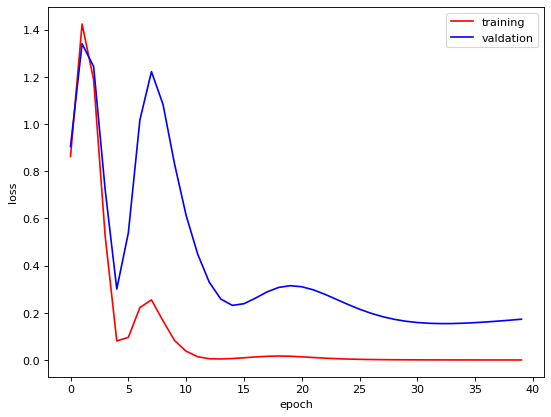

In [60]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(train_loss_arr), 'red', label = 'training')
plt.plot(np.array(val_loss_arr), 'blue', label = 'valdation')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt

In [71]:
# prediction for training set
with torch.no_grad():
    output = cnn_model(cnn_train_input)
    
_, prediction = torch.max(output, axis=1)

prediction = prediction.detach().numpy()

correct_num = 0
for i in range(prediction.shape[0]):
    if (prediction[i] == cnn_train_label[i]):
        correct_num = correct_num + 1
train_accuracy = correct_num/prediction.shape[0]
train_accuracy


1.0

In [ ]:
# prediction for validation set
with torch.no_grad():
    output = cnn_model(cnn_val_input)

_, prediction = torch.max(output, axis=1)

correct_num = 0
for i in range(prediction.shape[0]):
    if (prediction[i] == cnn_val_label[i]):
        correct_num = correct_num + 1

val_accuracy = correct_num/prediction.shape[0]
val_accuracy

torch.Size([13])


0.9230769230769231

In [72]:
# general settings
# The number of expected features in the input x is 3
rnn_input_size = 2
# output_size = 4 as we want to predict the next one, two, three, and four trading data 
rnn_output_size = 4

In [197]:
date = data[['Date']].values
date.shape

(15355, 1)

In [257]:
test_date = test_data[['Date']].values
test_date.shape

(10340, 1)

In [201]:
rnn_hidden_size = 50
rnn_num_layers = 1
rnn_training_epochs = 200
rnn_learning_rate = 0.001

In [79]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers        
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
#         print(x.shape)
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        res, hidden = self.rnn(x, hidden)
        res = self.linear(res)
        return res[:, -1, :], hidden
        
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden

In [ ]:
#Creating a data structure with 180 timesteps and 4 output
rnn_input = []
rnn_label = []
for i in range(dataset.shape[0] - window_size - rnn_output_size +1):
    rnn_input.append(dataset[i:i+window_size, ])
    rnn_label.append(dataset[i+window_size: i+ window_size + rnn_output_size, 0])
rnn_input = np.array(rnn_input)


(15324, 28, 1)


In [82]:
# loading images of the whole dataset
cnn_full_input = []
for i in range(rnn_input.shape[0]):
# for i in range(20):
    if i % 1000 == 0:
        print(i)
    x = rnn_input[i,:, 0]
    # function to plot the sp500 price data    
    plt.axis('off')
    plt.plot(x, color ="black") 
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
    #figure.canvas.draw()
    #width, height = figure.get_size_inches() * figure.get_dpi()
    #mplimage = np.frombuffer(figure.canvas.buffer_rgba(), dtype='uint8').reshape(800, 800, 3)
    
    # Ensure figure is drawn
    figure.canvas.draw()

    # Get correct dimensions dynamically
    width, height = map(int, figure.get_size_inches() * figure.get_dpi())

    # Convert to NumPy array with correct shape
    mplimage = np.frombuffer(figure.canvas.buffer_rgba(), dtype='uint8').reshape(height, width, 4)[..., :3]
    
    gray_image = color.rgb2gray(mplimage)
    img_resize = resize(gray_image, (180, 180),anti_aliasing=True)
    img_resize = img_resize.astype('float32')
    plt.clf()   
    # appending the image into the list
    cnn_full_input.append(img_resize)
    
# converting the list to numpy array
cnn_full_input = np.array(cnn_full_input)
# defining the target
# cnn_full_input.shape
cnn_full_input = cnn_full_input.reshape(cnn_full_input.shape[0], 1, cnn_full_input.shape[1], cnn_full_input.shape[2])
cnn_full_input = cnn_full_input.astype('float64')
cnn_full_input = torch.from_numpy(cnn_full_input)

cnn_full_input.shape

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


torch.Size([15324, 1, 180, 180])

<Figure size 800x800 with 0 Axes>

In [84]:
rnn_dataset = data[ ['Close']].values
rnn_dataset = np.append(rnn_dataset, np.zeros([len(rnn_dataset),1]),1)
rnn_dataset

array([[  59.91    ,    0.      ],
       [  60.389999,    0.      ],
       [  60.130001,    0.      ],
       ...,
       [3727.04    ,    0.      ],
       [3732.04    ,    0.      ],
       [3756.07    ,    0.      ]])

In [ ]:
# predict sell signal for whole dataset
with torch.no_grad():
    output = cnn_model(cnn_full_input)


softmax = torch.exp(output)
sell_possibility = softmax.numpy()[:,1]/np.sum(softmax.numpy(), axis = 1) 
sell_possibility

array([6.74401179e-06, 3.57261078e-05, 3.00515538e-05, ...,
       7.78666007e-02, 3.01344533e-02, 2.74637431e-02])

In [ ]:
# predict sell signal for whole dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
cnn_full_input = cnn_full_input.to(device)

with torch.no_grad():
    output = cnn_model(cnn_full_input)

softmax = torch.exp(output)
sell_possibility = softmax.cpu().numpy()[:, 1] / np.sum(softmax.cpu().numpy(), axis=1)
sell_possibility

In [299]:
print(sell_possibility.shape)
data.iloc[15324,0]

(15324,)


Timestamp('2020-11-17 00:00:00')

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

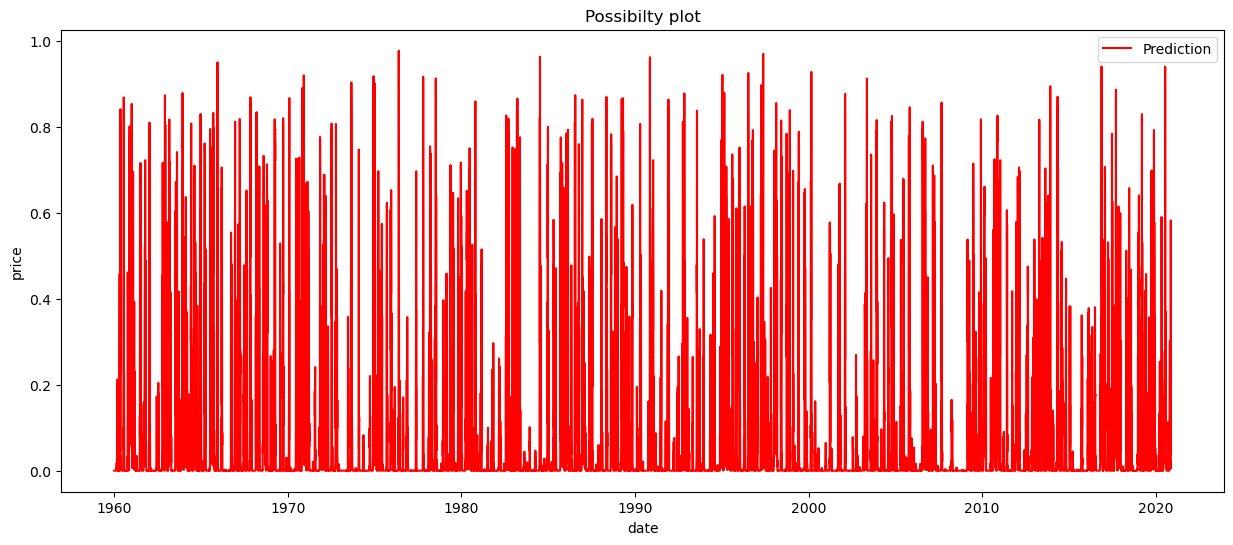

In [315]:
plt.figure(figsize=[15,6])
plt.plot(data.iloc[0:15324,0], sell_possibility, 'red', label = 'Prediction')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Possibilty plot")
plt.legend()
plt

In [39]:
sell_possibility.shape
# cnn_full_input.shape

(15324,)

In [303]:
for i in range(len(sell_possibility)):
    rnn_dataset[i+ window_size, 1] = sell_possibility[i]
sc = MinMaxScaler(feature_range = (0, 1))
rnn_dataset = sc.fit_transform(rnn_dataset)
rnn_dataset

array([[0.00208161, 0.        ],
       [0.0022112 , 0.        ],
       [0.002141  , 0.        ],
       ...,
       [0.99216225, 0.        ],
       [0.99351219, 0.        ],
       [1.        , 0.        ]])

In [305]:
rnn_input = []
rnn_label = []
date_list = []
for i in range(rnn_dataset.shape[0] - window_size - rnn_output_size + 1):
    rnn_input.append(rnn_dataset[i: i + window_size, ])
    rnn_label.append(rnn_dataset[i + window_size: i + window_size + rnn_output_size, 0])
    date_list.append(date[i + window_size])
rnn_input = np.array(rnn_input)
rnn_label = np.array(rnn_label)
date_list = np.array(date_list)
rnn_label = np.reshape(rnn_label, (rnn_label.shape[0], 1, rnn_label.shape[1]))
print("rnn_input: " , rnn_input.shape)
print("rnn_label: " , rnn_label.shape)
print("date_list: " , date_list.shape)

rnn_input:  (15324, 28, 2)
rnn_label:  (15324, 1, 4)
date_list:  (15324, 1)


In [307]:
rnn_train_input = []
rnn_train_label = []
rnn_val_input = []
rnn_val_label = []
rnn_test_input = []
rnn_test_label = []
rnn_train_date = []
rnn_val_date = []
rnn_test_date = []

"""
80% 用于训练
"""
for i in range(rnn_input.shape[0]):
    if i % rnn_input.shape[0] <= rnn_input.shape[0] * 0.9:
        rnn_train_input.append(rnn_input[i,])
        rnn_train_label.append(rnn_label[i,])
        rnn_train_date.append(date_list[i,])
    else: 
        rnn_val_input.append(rnn_input[i,])
        rnn_val_label.append(rnn_label[i,])
        rnn_val_date.append(date_list[i,])
rnn_train_input = np.array(rnn_train_input)
rnn_train_label = np.array(rnn_train_label)
rnn_val_input = np.array(rnn_val_input)
rnn_val_label = np.array(rnn_val_label)
# rnn_test_input = np.array(rnn_test_input)
# rnn_test_label = np.array(rnn_test_label)
rnn_val_date = np.array(rnn_val_date)
rnn_train_date = np.array(rnn_train_date)
# rnn_test_date = np.array(rnn_test_date)

print("rnn_train_input: " , rnn_train_input.shape)
print("rnn_train_label: " , rnn_train_label.shape)
print("rnn_val_input: " , rnn_val_input.shape)
print("rnn_val_label: " , rnn_val_label.shape)
# print("rnn_test_input: " , rnn_test_input.shape)
# print("rnn_test_label: " , rnn_test_label.shape)
print("rnn_train_date: " , rnn_train_date.shape)
print("rnn_val_date: " , rnn_val_date.shape)
# print("rnn_test_date: " , rnn_test_date.shape)

rnn_train_input:  (13792, 28, 2)
rnn_train_label:  (13792, 1, 4)
rnn_val_input:  (1532, 28, 2)
rnn_val_label:  (1532, 1, 4)
rnn_train_date:  (13792, 1)
rnn_val_date:  (1532, 1)


In [309]:
out_temp = np.concatenate((rnn_train_label[:, 0, [0]], rnn_train_label[:, 0, [0]]), axis=1)
actual_price_train = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate((rnn_val_label[:, 0, [0]], rnn_val_label[:, 0, [0]]), axis=1)
actual_price_val = sc.inverse_transform(out_temp)[:, [0]]
# out_temp = np.concatenate((rnn_test_label[:, 0, [0]], rnn_test_label[:, 0, [0]]), axis=1)
# actual_price_test = sc.inverse_transform(out_temp)[:, [0]]
actual_price_train

array([[  55.18    ],
       [  55.459999],
       [  55.169998],
       ...,
       [2063.5     ],
       [2069.41    ],
       [2067.03    ]])

In [311]:
rnn_model = RNN(rnn_input_size, rnn_output_size, rnn_hidden_size, rnn_num_layers)
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=rnn_learning_rate)
criterion = nn.MSELoss()
rnn_model

RNN(
  (rnn): RNN(2, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=4, bias=True)
)

In [313]:
rnn_train_loss_arr = []
rnn_val_loss_arr = []
for epoch in range(rnn_training_epochs):
    # make training sets in torch
    rnn_train_inputv = Variable(torch.from_numpy(rnn_train_input).float())
    rnn_train_labelv = Variable(torch.from_numpy(rnn_train_label).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output_train, hidden = rnn_model(rnn_train_inputv)   
    
    # Compute loss
    loss = criterion(output_train.reshape(-1), rnn_train_labelv.view(-1))
    rnn_train_loss_arr.append(loss.item())
    
    # Backward pass
    loss.backward(retain_graph=True)
    
    
    rnn_val_inputv = Variable(torch.from_numpy(rnn_val_input).float())
    rnn_val_labelv = Variable(torch.from_numpy(rnn_val_label).float())
    
    output_val, hidden = rnn_model(rnn_val_inputv)   
    
    loss_val = criterion(output_val.reshape(-1), rnn_val_labelv.view(-1))
    rnn_val_loss_arr.append(loss_val.item())
       
    
    if (epoch % 10 == 0 or epoch == rnn_training_epochs - 1):
        print("[%d/%d] Training Loss: %.4f" % (epoch, rnn_training_epochs, loss.item()))
        print("[%d/%d] Validation Loss: %.4f" % (epoch, rnn_training_epochs, loss_val.item()))
    
    # Update parameters
    optimizer.step()               


[0/200] Training Loss: 0.0357
[0/200] Validation Loss: 0.4281
[10/200] Training Loss: 0.0184
[10/200] Validation Loss: 0.2380
[20/200] Training Loss: 0.0136
[20/200] Validation Loss: 0.2137
[30/200] Training Loss: 0.0013
[30/200] Validation Loss: 0.0451
[40/200] Training Loss: 0.0013
[40/200] Validation Loss: 0.0421
[50/200] Training Loss: 0.0006
[50/200] Validation Loss: 0.0114
[60/200] Training Loss: 0.0002
[60/200] Validation Loss: 0.0213
[70/200] Training Loss: 0.0001
[70/200] Validation Loss: 0.0135
[80/200] Training Loss: 0.0001
[80/200] Validation Loss: 0.0138
[90/200] Training Loss: 0.0001
[90/200] Validation Loss: 0.0139
[100/200] Training Loss: 0.0001
[100/200] Validation Loss: 0.0119
[110/200] Training Loss: 0.0001
[110/200] Validation Loss: 0.0122
[120/200] Training Loss: 0.0000
[120/200] Validation Loss: 0.0115
[130/200] Training Loss: 0.0000
[130/200] Validation Loss: 0.0108
[140/200] Training Loss: 0.0000
[140/200] Validation Loss: 0.0105
[150/200] Training Loss: 0.0000


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

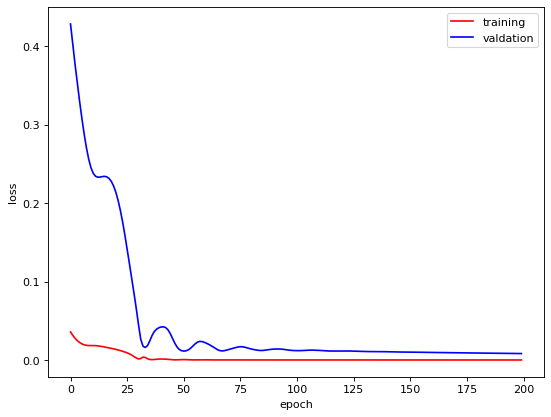

In [317]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(rnn_train_loss_arr), 'red', label = 'training')
plt.plot(np.array(rnn_val_loss_arr), 'blue', label = 'valdation')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt

In [319]:
test_dataset = test_data[['Close']].values
test_scaler = MinMaxScaler(feature_range = (0, 1))
test_dataset = scaler.fit_transform(test_dataset)
test_dataset

array([[0.00206132],
       [0.00191369],
       [0.00226909],
       ...,
       [0.99206364],
       [0.99343057],
       [1.        ]])

In [321]:
#Creating a data structure with 180 timesteps and 4 output
rnn_test_input = []
for i in range( test_dataset.shape[0] - window_size - rnn_output_size +1):
    rnn_test_input.append(test_dataset[i:i+window_size, ])
rnn_test_input = np.array(rnn_test_input)
rnn_test_input.shape

(10309, 28, 1)

In [323]:
# loading images of the whole dataset
cnn_test_input = []
for i in range(rnn_test_input.shape[0]):
# for i in range(20):
    if i % 1000 == 0:
        print(i)
    x = rnn_test_input[i,:, 0]
    # function to plot the sp500 price data    
    plt.axis('off')
    plt.plot(x, color ="black") 
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
   # Ensure figure is drawn
    figure.canvas.draw()

    # Get correct dimensions dynamically
    width, height = map(int, figure.get_size_inches() * figure.get_dpi())

    # Convert to NumPy array with correct shape
    mplimage = np.frombuffer(figure.canvas.buffer_rgba(), dtype='uint8').reshape(height, width, 4)[..., :3]

    gray_image = color.rgb2gray(mplimage)
    img_resize = resize(gray_image, (180, 180),anti_aliasing=True)
    img_resize = img_resize.astype('float32')
    plt.clf()   
    # appending the image into the list
    cnn_test_input.append(img_resize)
    
# converting the list to numpy array
cnn_test_input = np.array(cnn_test_input)
# defining the target
# cnn_full_input.shape
cnn_test_input = cnn_test_input.reshape(cnn_test_input.shape[0], 1, cnn_test_input.shape[1], cnn_test_input.shape[2])
cnn_test_input = cnn_test_input.astype('float64')
cnn_test_input = torch.from_numpy(cnn_test_input)

cnn_test_input.shape

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


torch.Size([10309, 1, 180, 180])

<Figure size 800x800 with 0 Axes>

NameError: name 'cnn_test_input' is not defined

In [325]:
rnn_test_dataset = test_data[ ['Close']].values
rnn_test_dataset = np.append(rnn_test_dataset, np.zeros([len(rnn_test_dataset),1]),1)
rnn_test_dataset

array([[ 105.760002,    0.      ],
       [ 105.220001,    0.      ],
       [ 106.519997,    0.      ],
       ...,
       [3727.04    ,    0.      ],
       [3732.04    ,    0.      ],
       [3756.07    ,    0.      ]])

rnn_test_input:  (10309, 28, 2)
rnn_test_label:  (10309, 1, 4)
test_date_list:  (10309, 1)


In [327]:
# predict sell signal for whole dataset
with torch.no_grad():
    output = cnn_model(cnn_test_input)

softmax = torch.exp(output)
sell_possibility_test = softmax.numpy()[:,1]/np.sum(softmax.numpy(), axis = 1) 
sell_possibility_test

array([0.22418126, 0.23282916, 0.20755959, ..., 0.04830496, 0.04366932,
       0.04087326])

In [329]:
plt.figure(figsize=[15,6])
#plt.plot(test_date_list[:, 0], sell_possibility_test)
plt.plot(data[:, 0], sell_possibility_test)
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Sell Point Possibility")
plt

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1500x600 with 0 Axes>

In [ ]:
for i in range(len(sell_possibility_test)):
    rnn_test_dataset[i+ window_size, 1] = sell_possibility_test[i]
sc = MinMaxScaler(feature_range = (0, 1))
rnn_test_dataset = sc.fit_transform(rnn_test_dataset)
rnn_test_dataset

In [ ]:
rnn_test_input = []
rnn_test_label = []
test_date_list = []
for i in range(rnn_test_dataset.shape[0] - window_size - rnn_output_size + 1):
    rnn_test_input.append(rnn_test_dataset[i: i + window_size, ])
    rnn_test_label.append(rnn_test_dataset[i + window_size: i + window_size + rnn_output_size, 0])
    test_date_list.append(test_date[i + window_size])
rnn_test_input = np.array(rnn_test_input)
rnn_test_label = np.array(rnn_test_label)
test_date_list = np.array(test_date_list)
rnn_test_label = np.reshape(rnn_test_label, (rnn_test_label.shape[0], 1, rnn_test_label.shape[1]))
print("rnn_test_input: " , rnn_test_input.shape)
print("rnn_test_label: " , rnn_test_label.shape)
print("test_date_list: " , test_date_list.shape)

In [ ]:
rnn_test_output, _ = rnn_model(Variable(torch.from_numpy(rnn_test_input).float()))
rnn_test_output = np.concatenate((rnn_test_output.detach().numpy()[:, [0]], rnn_test_output.detach().numpy()[:, [0]]), axis=1)
prediction_price = sc.inverse_transform(rnn_test_output)[:, [0]]
prediction_price
# rnn_test_output

In [ ]:
actual_price = np.concatenate( (rnn_test_label[:, :, 0], rnn_test_label[:, :, 0]), axis = 1)
actual_price = sc.inverse_transform(actual_price)[:, [0]]
actual_price

In [ ]:
count = 0
for i in actual_price:
    if i == 0:
        count = count + 1
count

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_price[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual_price[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt

In [94]:
def calculate_prediction_error(predicted, actual):
    return abs(predicted - actual)/actual

In [113]:
prediction_error = calculate_prediction_error(prediction_price, actual_price)
prediction_error

array([[0.10094415],
       [0.06586037],
       [0.14993364],
       ...,
       [0.1664206 ],
       [0.15092979],
       [0.15262458]])

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

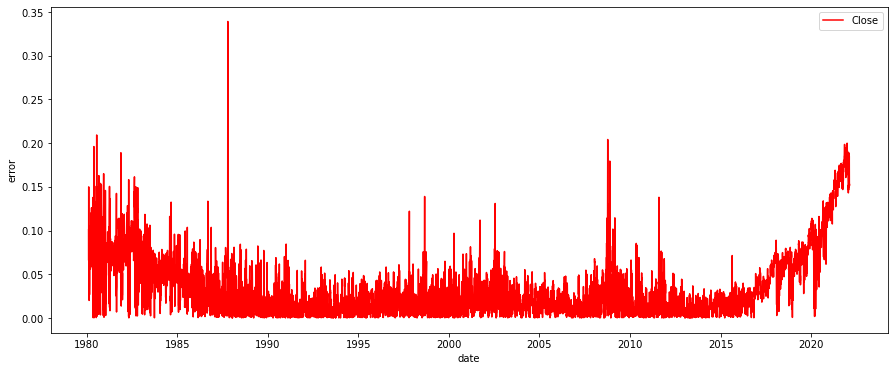

In [114]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_error[:, 0], 'red', label = 'Close')

plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("error")
plt.legend()
plt

In [96]:
# assuming you start with $1 million.
curr_money = 1
money_arr = []
sell_date_arr = []
# if you haven't sell the stock, you cannot buy the new stock
sell_day = 0
for i in range(window_size-1, rnn_input.shape[0]):
    temp = sc.inverse_transform(rnn_input[i,:,:])
    prob_temp = temp[:, 1]
    price_temp = temp[:, 0]
    if prob_temp[window_size-1] > 0.95 and (i-sell_day > window_size):
        # sell at this point
        # buy at the local minia in this window interval
        buy_price = min(price_temp)
        # in case of the overflow
        if buy_price > 0:
            sell_price = price_temp[len(price_temp)-1]
            curr_money = sell_price/buy_price*curr_money
            sell_day = i
            print(buy_price)
            print(sell_price)
            print(curr_money)


102.08890900769975
104.66395227385246
1.0252235359470683
100.71893203848377
104.10581581069957
1.0596988117121657
102.15233248143761
105.64069330423602
1.095886060000544
106.08467030534943
109.56034237421679
1.1317907817519666
113.70832685870948
117.6913994024281
1.1714361174328933
118.09731775271737
123.14592089196594
1.2215144441251589
118.13537132956215
120.49477174061853
1.2459105386152687
99.85636061809845
109.83941377703034
1.3704693655270455
110.74004384823981
114.03812790735046
1.4112849820906292
114.87533957880144
119.42923099712982
1.4672311807466913
118.13537132956215
122.75269129560775
1.524577898748424
125.61949218151543
128.86683644683987
1.5639892131118616
129.29811962004285
131.695573607944
1.5929888009405786
131.75900215566125
137.36574810053693
1.66077531536298
135.1585696078287
138.82451844038383
1.7058210519829882
137.98731691689161
142.28751317177372
1.758980758709182
141.13317905765408
144.81181537564544
1.8048285922578917
141.80548005682581
146.4481749937439
1.86

In [98]:
curr_money 

5681.062381611438

In [ ]:
# belowing is the nosiy corrupted 


noise_dev = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
def add_gaussian_noise(dataset, std_dev):
    dataset_new = dataset.copy()
    noise = np.random.normal(0, std_dev, int(dataset_new.shape[0] * 0.1))
    # Add the noise to image
    gp = np.random.uniform(0, dataset_new.shape[0], int(dataset_new.shape[0] * 0.1))
    for i in range(int(dataset_new.shape[0] * 0.1)):
        if dataset_new[int(gp[i]), 0] + noise[i] < 0:
            dataset_new[int(gp[i]), 0] = -(dataset_new[int(gp[i]), 0] + noise[i])
        else:
            dataset_new[int(gp[i]), 0] = dataset_new[int(gp[i]), 0] + noise[i]
    #gaussian_out = img + noise
    # Make the value between 0 and 1
    gaussian_out = np.clip(dataset_new, 0.00000001, 1)
    return gaussian_out

In [103]:
rnn_test_input_noise = []
rnn_test_label_noise = []
rnn_test_date_noise = []

for j in range(9):
    rnn_input_testsingle = []
#    rnn_label_testsingle = []
#    rnn_date_testsingle = []
    for i in range(rnn_test_input.shape[0]):
        input_temp = rnn_test_input[i,];
        rnn_input_testsingle.append(add_gaussian_noise(input_temp, noise_dev[j]))
    rnn_test_input_noise.append(rnn_input_testsingle)
#    rnn_test_label_noise.append(rnn_label_testsingle)
#    rnn_test_date_noise.append(rnn_date_testsingle)
rnn_test_input_noise = np.array(rnn_test_input_noise)
#rnn_test_label_noise = np.array(rnn_test_label_noise)
#rnn_test_date_noise = np.array(rnn_test_date_noise)

print("rnn_test_input_noise: " , rnn_test_input_noise.shape)
#print("rnn_test_label_noise: " , rnn_test_label_noise.shape)
#print("rnn_test_date_noise: " , rnn_test_date_noise.shape)

rnn_test_input_noise:  (9, 10594, 28, 2)


In [104]:
rnn_test_output_noise = []
prediction_price_noise = []
for i in range(9):
    test_output_temp = []
    prediction_temp = []
    test_ouput_temp, _ = rnn_model(Variable(torch.from_numpy(rnn_test_input_noise[i]).float()))
    test_ouput_temp = np.concatenate((test_ouput_temp.detach().numpy()[:, [0]], test_ouput_temp.detach().numpy()[:, [0]]), axis=1)
    prediction_temp = sc.inverse_transform(test_ouput_temp)[:, [0]]
    
    rnn_test_output_noise.append(test_output_temp)
    prediction_price_noise.append(prediction_temp)
rnn_test_output_noise = np.array(rnn_test_output_noise)
prediction_price_noise = np.array(prediction_price_noise)
rnn_test_output_noise.shape
prediction_price_noise.shape

(9, 10594, 1)

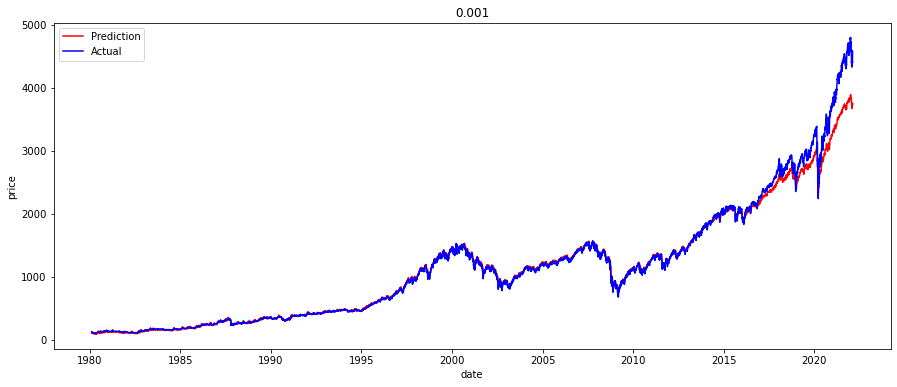

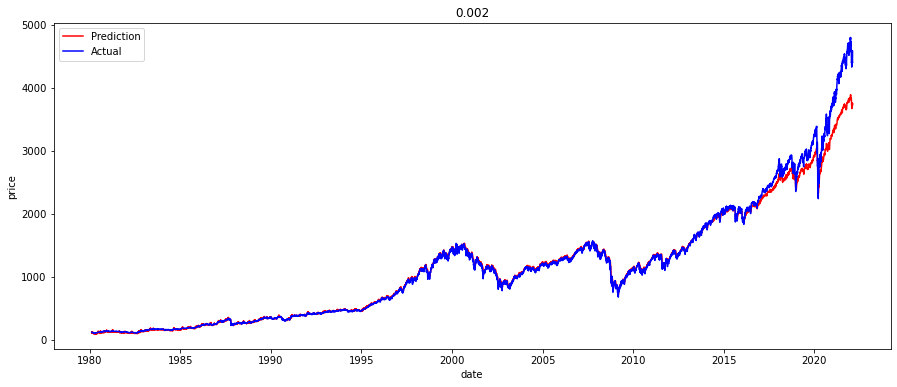

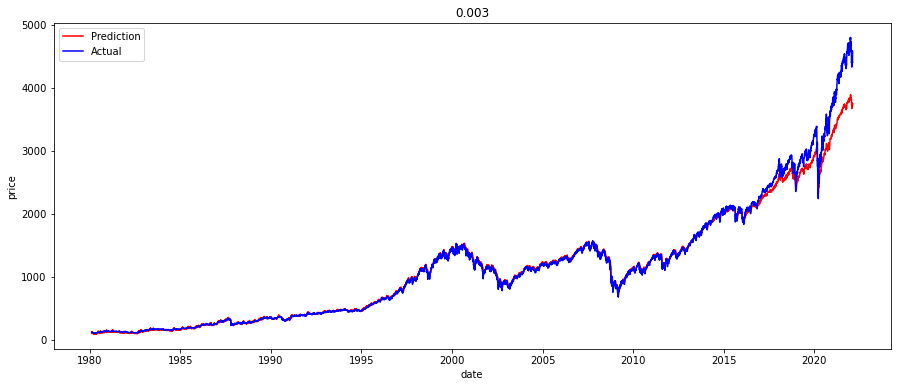

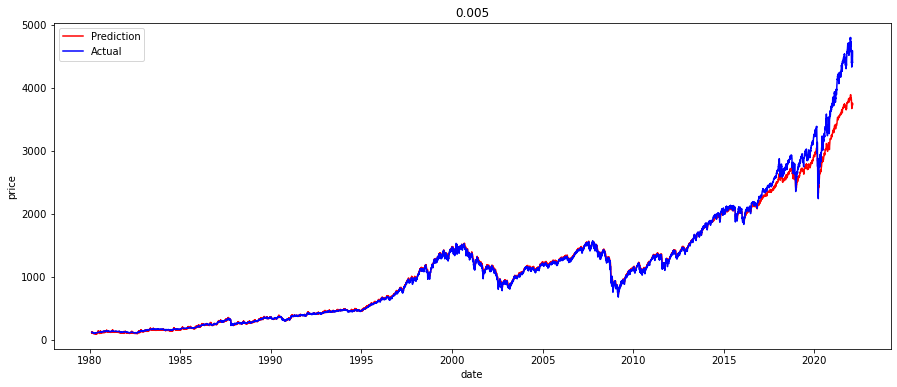

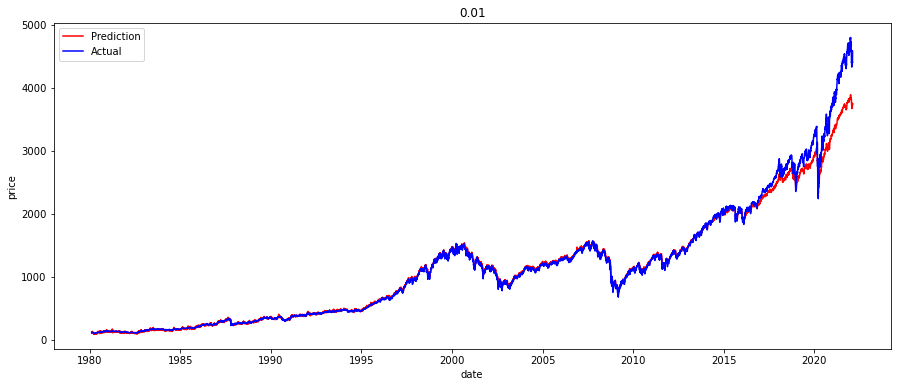

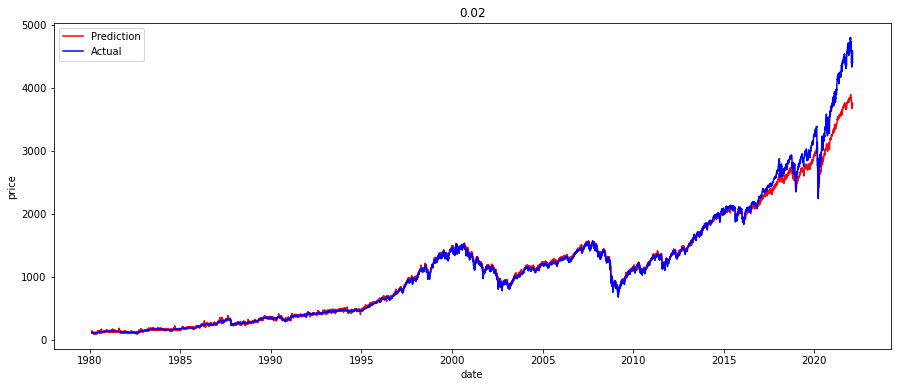

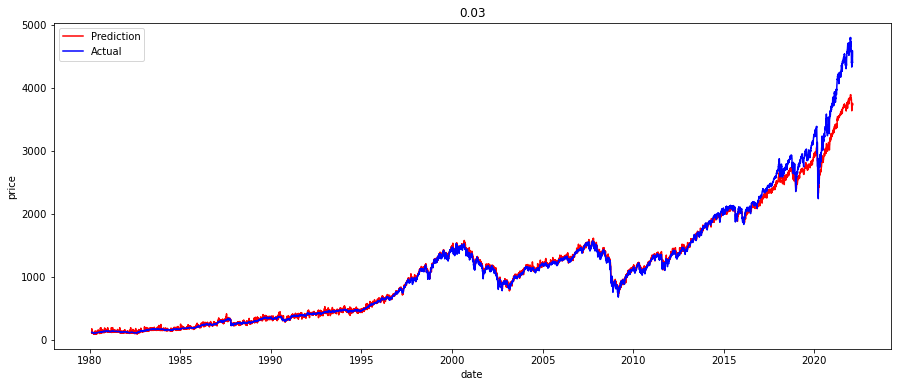

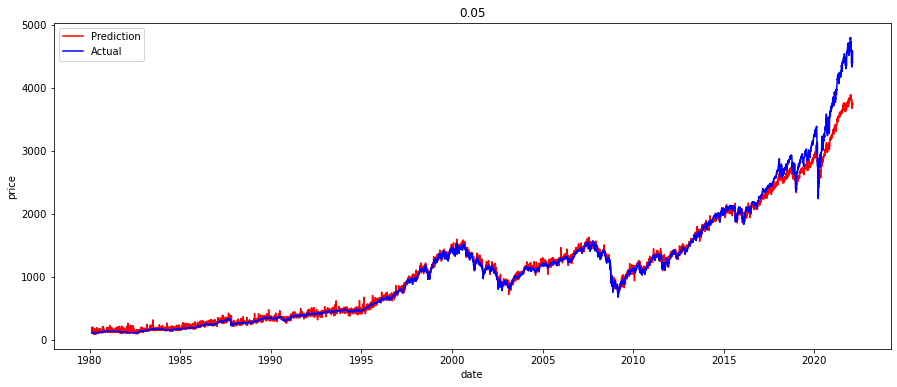

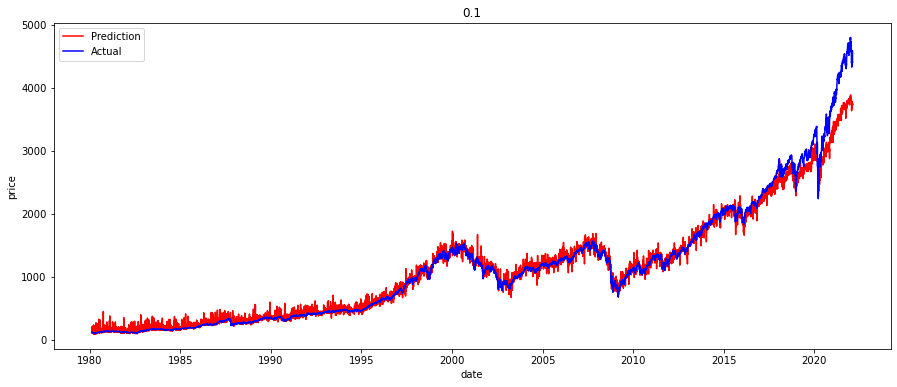

In [111]:
# test_length = int(rnn_input.shape[0] * 0.8) + 1
for i in range(9):
    plt.figure(figsize=[15,6])
    plt.plot(test_date_list[:, 0], prediction_price_noise[i][:, 0], 'red', label = 'Prediction')
    plt.plot(test_date_list[:, 0], actual_price[:, 0], 'blue', label = 'Actual')
    plt.xlabel("date")

    # date_ticks=np.arange(1996,2022,1)
    # plt.xticks(date_ticks)

    plt.ylabel("price")
    plt.title(noise_dev[i])
    plt.legend()
    plt

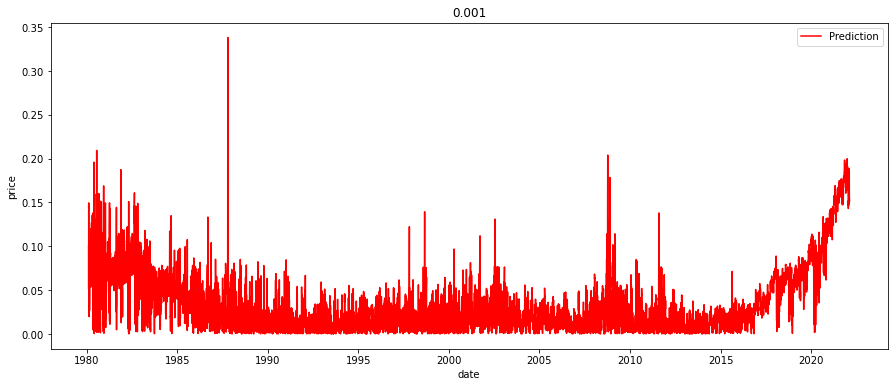

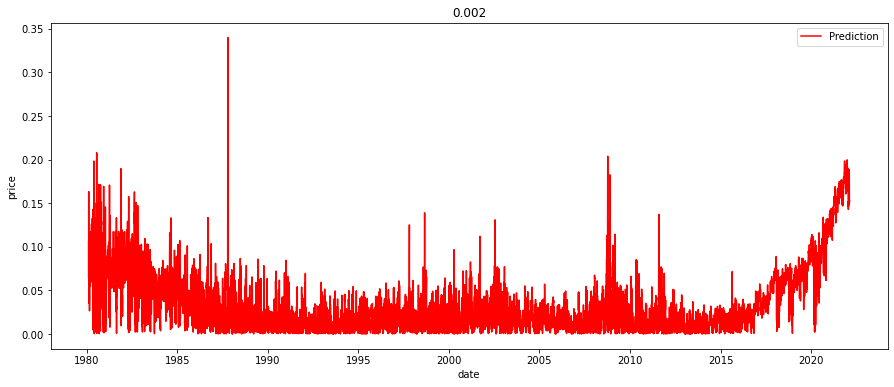

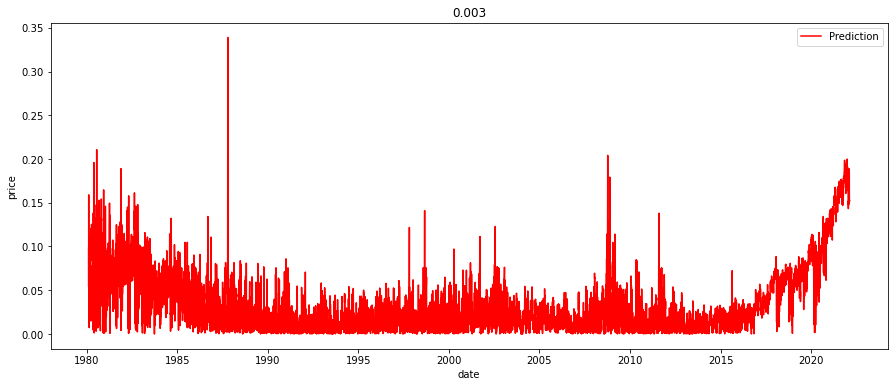

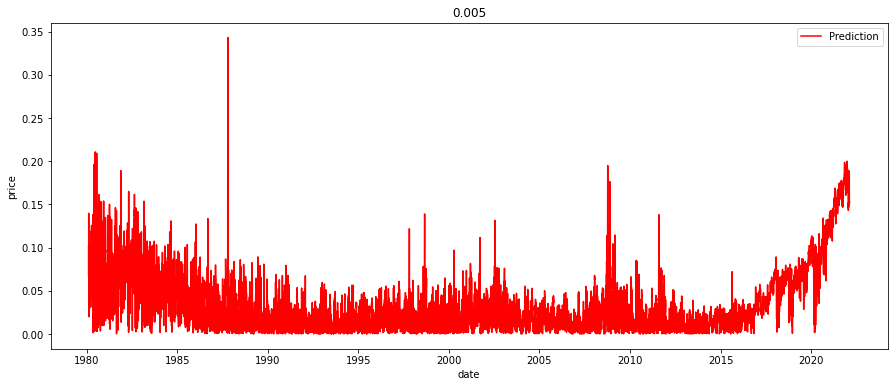

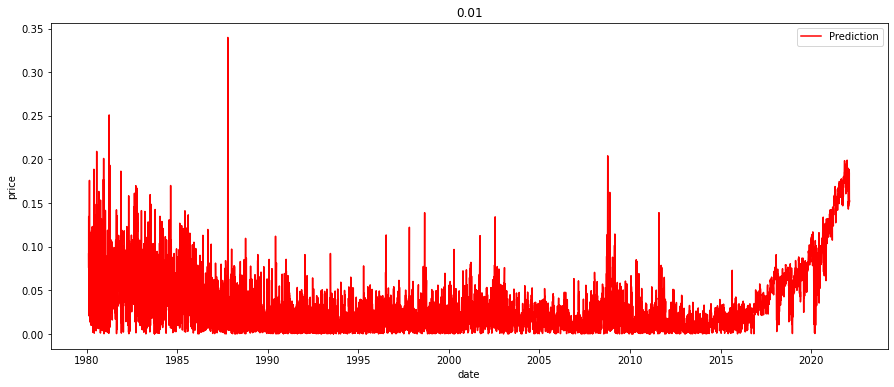

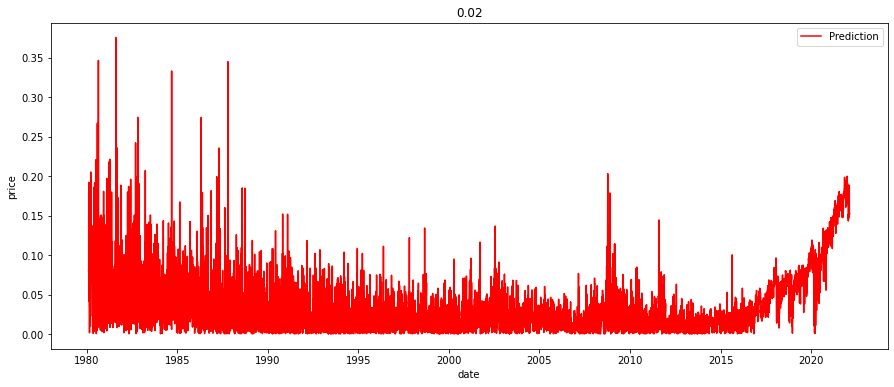

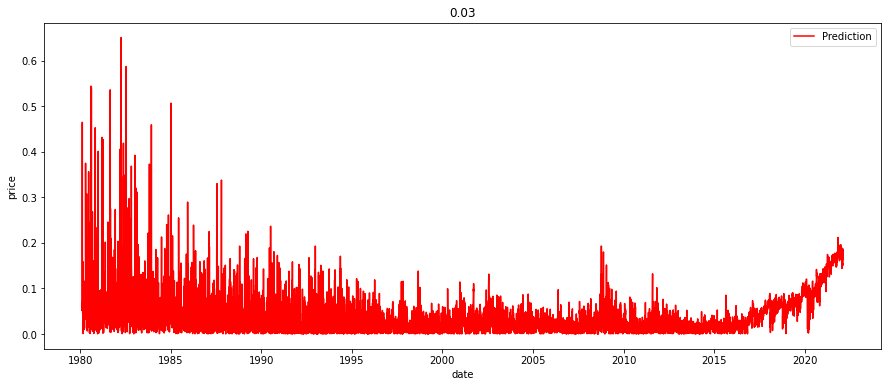

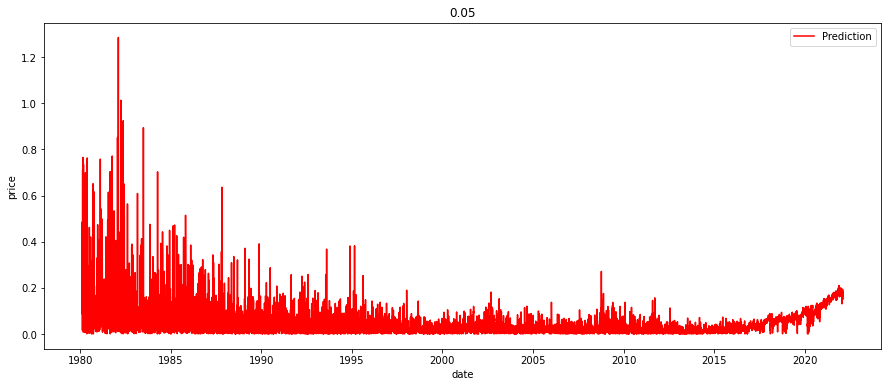

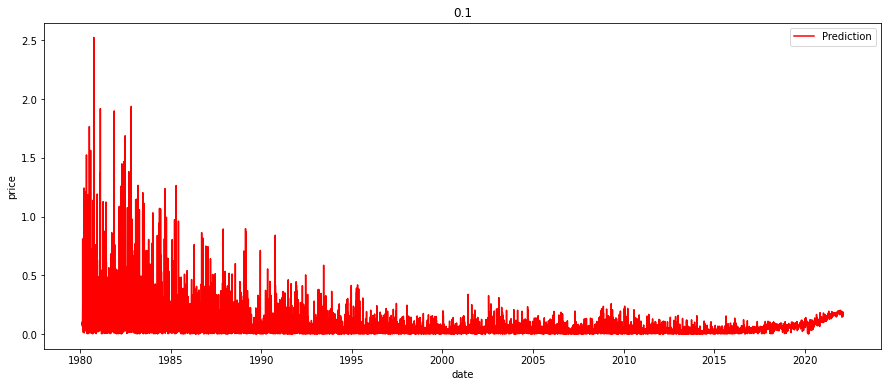

In [112]:
# test_length = int(rnn_input.shape[0] * 0.8) + 1
for i in range(9):
    plt.figure(figsize=[15,6])
    prediction_error = calculate_prediction_error(prediction_price_noise[i],actual_price)
    plt.plot(test_date_list[:, 0], prediction_error[:, 0], 'red', label = 'Prediction')
    plt.xlabel("date")

    # date_ticks=np.arange(1996,2022,1)
    # plt.xticks(date_ticks)

    plt.ylabel("price")
    plt.title(noise_dev[i])
    plt.legend()
    plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

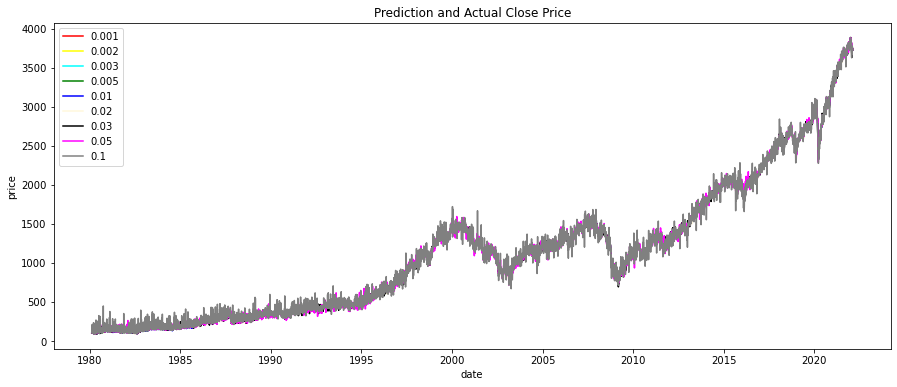

In [107]:
plt.figure(figsize=[15,6])

plt.plot(test_date_list[:, 0], prediction_price_noise[0][:, 0], 'red', label = noise_dev[0])
plt.plot(test_date_list[:, 0], prediction_price_noise[1][:, 0], 'yellow', label = noise_dev[1])
plt.plot(test_date_list[:, 0], prediction_price_noise[2][:, 0], 'cyan', label = noise_dev[2])
plt.plot(test_date_list[:, 0], prediction_price_noise[3][:, 0], 'green', label = noise_dev[3])
plt.plot(test_date_list[:, 0], prediction_price_noise[4][:, 0], 'blue', label = noise_dev[4])
plt.plot(test_date_list[:, 0], prediction_price_noise[5][:, 0], 'cornsilk', label = noise_dev[5])
plt.plot(test_date_list[:, 0], prediction_price_noise[6][:, 0], 'black', label = noise_dev[6])
plt.plot(test_date_list[:, 0], prediction_price_noise[7][:, 0], 'magenta', label = noise_dev[7])
plt.plot(test_date_list[:, 0], prediction_price_noise[8][:, 0], 'gray', label = noise_dev[8])

plt.xlabel("date")

    # date_ticks=np.arange(1996,2022,1)
    # plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt